In [2]:
import matplotlib
%matplotlib inline
from pylab import *

/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
# Planck 2016
h = 0.678

In [4]:
# MutluPakdil2016.pdf
MP16=[[5.00, -4.42, +0.27, -0.31, -3.84, +0.30, -0.39],
      [5.25, -4.29, +0.25, -0.31, -3.66, +0.24, -0.35],
      [5.50, -4.18, +0.24, -0.28, -3.48, +0.22, -0.31],
      [5.75, -4.08, +0.22, -0.26, -3.30, +0.19, -0.25],
      [6.00, -3.96, +0.20, -0.24, -3.14, +0.14, -0.22],
      [6.25, -3.84, +0.17, -0.22, -3.00, +0.11, -0.18],
      [6.50, -3.73, +0.15, -0.19, -2.88, +0.07, -0.13],
      [6.75, -3.62, +0.13, -0.17, -2.80, +0.06, -0.08],
      [7.00, -3.51, +0.11, -0.14, -2.74, +0.06, -0.07],
      [7.25, -3.41, +0.08, -0.12, -2.72, +0.08, -0.11],
      [7.50, -3.32, +0.07, -0.09, -2.75, +0.12, -0.15],
      [7.75, -3.25, +0.06, -0.06, -2.85, +0.16, -0.17],
      [8.00, -3.21, +0.07, -0.06, -2.97, +0.17, -0.16],
      [8.25, -3.20, +0.08, -0.09, -3.09, +0.16, -0.15],
      [8.50, -3.27, +0.11, -0.16, -3.25, +0.15, -0.18],
      [8.75, -3.45, +0.17, -0.27, -3.44, +0.17, -0.28],
      [9.00, -3.71, +0.25, -0.39, -3.70, +0.25, -0.39],
      [9.25, -4.02, +0.35, -0.46, -3.99, +0.34, -0.50],
      [9.50, -4.32, +0.39, -0.64, -4.32, +0.42, -0.59]]
# Notes : (1) SMBHmass listed as $\log(M_{bh}/M_⊙)$ in 0.25 dex intervals. 
#         For clumn 2,3 $log φ [h^3_{67.77} Mpc^{−3} dex^{−1}]$ 
#         (2) Normal-ized BHMF data for early-type galaxies in our sample, in units of h^3_{67.77} Mpc^{-3} dex-1. 
#         (3) Normalized BHMF data for all galaxies in our sample, in units of h^3_{67.77} Mpc^{−3} dex−1

#  +0.25 to remove the dex^{-1}, also need to change the h!!
MP16 = np.array(MP16)

MP16[:, 1] += 0.25 + np.log10(0.6777**3)
MP16[:, 4] += 0.25 + np.log10(0.6777**3)
# mass density 2.04 +1.16/-0.75 10^5 h^3_{67.77} MM_{\sun} Mpc^{-3}
# BH 3.99 +/- 1.54 (Graham et al. 2007) 7.25 +/-1.18 (Vika et al. 2009)
# (4.9±0.7)×10^5 M_{\sun} Mpc^{−3} Vika et al. 2009 <Millinnum simulation SAMI>

In [5]:
M04_mean = np.array([[6.506849315068493, -2.462264150943397],
[7, -2.5471698113207557],
[7.502283105022832, -2.716981132075473],
[8.031963470319635, -3.0424528301886804],
[8.506849315068493, -3.452830188679246],
[9.009132420091325, -4.174528301886793],
[9.502283105022832, -5.320754716981133],
[10.004566210045663, -7.075471698113208]])
M04_low = np.array([
[6.506849315068493, -2.603773584905661],
[7.009132420091325, -2.702830188679246],
[7.502283105022832, -2.8867924528301896],
[8.004566210045663, -3.169811320754718],
[8.506849315068493, -3.650943396226416],
[9, -4.457547169811322],
[9.502283105022832, -5.801886792452831],
[10.004566210045663, -7.797169811320756]])
M04_high = np.array([
[6.506849315068493, -2.2924528301886804],
[7, -2.3915094339622653],
[7.502283105022832, -2.561320754716982],
[8.004566210045663, -2.858490566037737],
[8.506849315068493, -3.2971698113207557],
[9, -3.9481132075471708],
[9.502283105022832, -4.981132075471699],
[10.004566210045663, -6.509433962264152]])
# Note: BHMF from Marconi et al. 2004 MNRAS.351..169M
# Best estimate of the local BHMF, X: log(M_{BH}); Y: log(dN/dM_{BH} [Mpc^{-3}])
# ρ_{BH} = 4.6 +1.9−1.4 h^2_{0.7} × 10^ 5 M_⊙ Mpc^{−3}.

In [6]:
# Shankar F. et al. 2004 fitting function
# \Phi = \Phi_* (M_{BH}/M_*)^{\alpha + 1} exp(-(M_{BH}/M_*)^\beta)
# \Phi_* = 7.7 +/- 0.3 10^{-3} Mpc^{-3}
phi = 7.7
# M_* = 6.4 +/- 1.1 10^7 M_{\sun}
M = 6.4
# \alpha = -1.11 +/- 0.02
alpha = -1.11 + 1
# \beta = 0.49 +/- 0.02
beta = 0.49
# The formula holds in 10^6 - 5 10^9 M_{\sun}
x = 10**(np.arange(6, np.log10(5.0e9),0.1))
Sh04 = phi * 0.001 * (x/M/1.0e7)**alpha * np.exp(-(x/M/1.0e7)**beta)
Sh04_low = (phi-0.3) * 0.001 * (x/(M-1.1)/1.0e7)**(alpha+0.02) * np.exp(-(x/(M-1.1)/1.0e7)**(beta+0.02))
Sh04_high = (phi+0.3) * 0.001 * (x/(M+1.1)/1.0e7)**(alpha-0.02) * np.exp(-(x/(M+1.1)/1.0e7)**(beta-0.02))

# The overall SMBH mass density amounts to ρ_{BH} = (4.2 ± 1.1) x 10^5 M_{\sun} Mpc^{−3}

In [7]:
# Greene, Jenny E.; Ho, Luis C. 2007ApJ...667..131G
GH07=np.array([[6.50, -5.00, +0.04, -0.05],
[6.75, -5.00, +0.03, -0.03],
[7.00, -4.93, +0.04, -0.04],
[7.25, -5.14, +0.03, -0.03],
[7.50, -5.29, +0.04, -0.05],
[7.75, -5.55, +0.04, -0.05],
[8.00, -5.87, +0.04, -0.04],
[8.25, -6.40, +0.04, -0.04],
[8.50, -6.88, +0.06, -0.07],
[8.75, -7.41, +0.08, -0.10]])
# Note: column 1: BH mass in log (M_{\sun}); column 2: \Phi log( Mpc^{−3} )
# redshift region 0.1 - 0.3

In [8]:
Sh13_R_low = np.array([
[6.003367003367004, -2.437722419928825],
[6.205387205387206, -2.352313167259786],
[6.400673400673401, -2.341637010676156],
[6.602693602693604, -2.352313167259786],
[6.804713804713805, -2.3950177935943056],
[7, -2.4270462633451952],
[7.202020202020202, -2.480427046263345],
[7.404040404040405, -2.5444839857651242],
[7.5993265993266, -2.6085409252669036],
[7.801346801346802, -2.6939501779359425],
[8.003367003367003, -2.8007117437722413],
[8.205387205387206, -2.9181494661921703],
[8.400673400673401, -3.046263345195729],
[8.602693602693604, -3.2277580071174374],
[8.804713804713806, -3.409252669039146],
[9, -3.6227758007117434],
[9.202020202020204, -3.8896797153024907],
[9.404040404040405, -4.188612099644128],
[9.606060606060607, -4.551601423487544],
[9.801346801346803, -4.9786476868327405],
[9.962962962962964, -5.3736654804270465]])
Sh13_R_high = np.array([
[6.003367003367004, -2.330960854092526],
[6.205387205387206, -2.2669039145907464],
[6.407407407407408, -2.2562277580071166],
[6.602693602693604, -2.2562277580071166],
[6.7979797979797985, -2.2775800711743766],
[7, -2.3096085409252662],
[7.202020202020202, -2.362989323843416],
[7.404040404040405, -2.4163701067615655],
[7.5993265993266, -2.480427046263345],
[7.801346801346802, -2.555160142348754],
[8.003367003367003, -2.6512455516014226],
[8.205387205387206, -2.758007117437722],
[8.407407407407408, -2.875444839857651],
[8.602693602693604, -3.0142348754448394],
[8.804713804713806, -3.185053380782918],
[9, -3.366548042704626],
[9.202020202020204, -3.558718861209964],
[9.404040404040405, -3.7935943060498216],
[9.606060606060607, -4.049822064056939],
[9.801346801346803, -4.338078291814947],
[9.962962962962964, -4.604982206405694]])
Sh13_B_low = np.array([
[6.01010101010101, -3.1316725978647684],
[6.198653198653199, -3.024911032028469],
[6.286195286195287, -2.9395017793594302],
[6.373737373737375, -2.9395017793594302],
[6.602693602693604, -2.9288256227758],
[6.643097643097644, -2.8861209964412806],
[6.885521885521886, -2.8861209964412806],
[7.148148148148149, -2.8861209964412806],
[7.397306397306398, -2.8861209964412806],
[7.437710437710439, -2.9074733096085406],
[7.565656565656566, -2.9181494661921703],
[7.727272727272728, -2.9395017793594302],
[7.787878787878789, -2.95017793594306],
[7.922558922558923, -2.9822064056939497],
[7.9966329966329965, -2.9928825622775794],
[8.191919191919194, -3.0676156583629886],
[8.286195286195287, -3.0996441281138787],
[8.441077441077441, -3.174377224199288],
[8.481481481481483, -3.185053380782918],
[8.52861952861953, -3.2170818505338072],
[8.62962962962963, -3.281138790035587],
[8.777777777777779, -3.3772241992882557],
[8.8989898989899, -3.483985765124555],
[9.080808080808081, -3.665480427046263],
[9.20875420875421, -3.804270462633452],
[9.303030303030305, -3.9323843416370106],
[9.43771043771044, -4.135231316725978],
[9.666666666666668, -4.551601423487544],
[9.767676767676768, -4.765124555160142],
[9.90909090909091, -5.106761565836299],
[9.962962962962964, -5.2562277580071175]])
Sh13_B_high = np.array([
[6.003367003367004, -3.024911032028469],
[6.077441077441078, -2.9822064056939497],
[6.138047138047138, -2.96085409252669],
[6.225589225589227, -2.9288256227758],
[6.326599326599327, -2.896797153024911],
[6.400673400673401, -2.875444839857651],
[6.528619528619529, -2.864768683274021],
[6.710437710437711, -2.832740213523131],
[6.865319865319866, -2.8113879003558715],
[6.986531986531987, -2.8113879003558715],
[7.154882154882156, -2.8113879003558715],
[7.404040404040405, -2.8113879003558715],
[7.5993265993266, -2.8220640569395012],
[7.7205387205387215, -2.854092526690391],
[7.875420875420875, -2.875444839857651],
[8.030303030303031, -2.9181494661921703],
[8.144781144781145, -2.95017793594306],
[8.225589225589227, -2.97153024911032],
[8.34006734006734, -3.024911032028469],
[8.481481481481483, -3.0996441281138787],
[8.62962962962963, -3.174377224199288],
[8.75084175084175, -3.259786476868327],
[8.905723905723907, -3.366548042704626],
[9.06734006734007, -3.483985765124555],
[9.22895622895623, -3.6334519572953736],
[9.673400673400675, -4.145907473309608],
[9.478114478114477, -3.900355871886121],
[9.84848484848485, -4.412811387900355],
[9.956228956228959, -4.594306049822064]])

In [9]:
# Sharkar et al. 2009 Fig. 5 Shadow regions
Sh09_low = np.array([
[6.304147465437788, 8370.74722673309],
[6.338709677419355, 9453.87283130794],
[6.3663594470046085, 10188.96525567091],
[6.428571428571429, 12172.109585547032],
[6.470046082949309, 13747.109187935257],
[6.511520737327189, 15381.258460038924],
[6.573732718894009, 17699.76416076654],
[6.65668202764977, 21343.630444392584],
[6.7050691244239635, 23437.90011977001],
[6.76036866359447, 26224.015141972122],
[6.829493087557603, 30176.91202362798],
[6.8917050691244235, 33764.108294755715],
[6.947004608294931, 37077.09426038573],
[7.009216589861751, 41098.042622204404],
[7.1336405529953915, 49558.93342695471],
[7.202764976958525, 55450.11344733064],
[7.2926267281106, 63808.42850117597],
[7.35483870967742, 70069.40913385972],
[7.3963133640553, 74814.14892641695],
[7.486175115207374, 85289.25265718707],
[7.534562211981567, 90216.20470156815],
[7.576036866359447, 95427.77474518532],
[7.610599078341014, 100000],
[7.693548387096774, 111887.22115874222],
[7.741935483870968, 120587.08946926577],
[7.824884792626729, 131185.60389837532],
[7.928571428571429, 148160.25176256624],
[7.97004608294931, 156719.10803783083],
[8.059907834101383, 170493.30007751405],
[8.163594470046084, 187222.36353921617],
[8.232718894009217, 198037.74271132651],
[8.308755760368664, 203677.51582919754],
[8.426267281105991, 213436.30444392585],
[8.55069124423963, 217469.5090277959],
[8.647465437788018, 211447.839498008],
[8.744239631336406, 194364.92101207582],
[8.85483870967742, 161182.19775228418],
[8.930875576036867, 137471.09187935258],
[8.972350230414747, 122865.76648848283],
[9.006912442396313, 110844.83140340062],
[9.041474654377879, 100000],
[9.089861751152075, 86091.31660626775],
[9.12442396313364, 76227.87640438514],
[9.152073732718893, 66865.67791354196],
[9.193548387096774, 55450.11344733064],
[9.235023041474655, 47292.9873567907],
[9.255760368663594, 42268.443944722545],
[9.283410138248847, 37077.09426038573],
[9.32488479262673, 31036.298395544523],
[9.352534562211982, 26224.015141972122],
[9.380184331797235, 22788.911258644643],
[9.414746543778802, 19076.021571856614],
[9.428571428571429, 17209.662670181497],
[9.456221198156681, 14677.992676220705],
[9.490783410138249, 12636.47714632996],
[9.518433179723502, 10677.148537601186],
[9.539170506912441, 8690.092320062186]])
Sh09_high = np.array([
[6.006912442396313, 10000],
[6.048387096774194, 10878.909547925594],
[6.124423963133641, 12636.47714632996],
[6.1728110599078345, 13876.387617985984],
[6.221198156682028, 15095.99657480242],
[6.297235023041475, 17534.865500829594],
[6.345622119815669, 19255.413332459433],
[6.394009216589861, 21544.346900318822],
[6.442396313364055, 23658.31118145185],
[6.490783410138249, 25979.700872256446],
[6.573732718894009, 30176.91202362798],
[6.629032258064516, 33449.547255342964],
[6.691244239631336, 37077.09426038573],
[6.73963133640553, 40335.835475864755],
[6.808755760368664, 45555.0560546802],
[6.870967741935484, 50970.286316889025],
[6.947004608294931, 58106.89141122217],
[6.9953917050691246, 63213.96157738218],
[7.050691244239632, 69416.61220595722],
[7.092165898617512, 74117.14795000633],
[7.1405529953917055, 79880.17808015701],
[7.195852534562212, 86900.92320062169],
[7.258064516129032, 96325.18180972776],
[7.299539170506913, 103815.01298126896],
[7.35483870967742, 114001.50089399914],
[7.417050691244239, 124021.2016553578],
[7.493087557603687, 138763.87617985986],
[7.541474654377881, 149553.55740100483],
[7.631336405529954, 167331.31952002877],
[7.693548387096774, 180342.28206761944],
[7.7626728110599075, 194364.92101207582],
[7.8663594470046085, 221578.9271652028],
[7.928571428571429, 236583.1118145185],
[8.011520737327189, 254978.79539629238],
[8.108294930875577, 274804.848085334],
[8.205069124423964, 293413.218186004],
[8.315668202764977, 313281.6513467556],
[8.453917050691246, 325233.38701356814],
[8.509216589861751, 328291.8963407571],
[8.578341013824886, 322203.37208239915],
[8.695852534562214, 313281.6513467556],
[8.778801843317972, 293413.218186004],
[8.868663594470046, 269708.2983302793],
[8.91705069124424, 254978.79539629238],
[8.993087557603687, 232195.42502889788],
[9.034562211981568, 213436.30444392585],
[9.096774193548388, 188983.01102501433],
[9.152073732718893, 164227.98127307012],
[9.200460829493087, 146779.92676220674],
[9.248847926267281, 131185.60389837532],
[9.276497695852534, 121721.09585547032],
[9.304147465437788, 111887.22115874222],
[9.352534562211982, 96325.18180972776],
[9.394009216589861, 83707.4722673309],
[9.414746543778802, 76944.72676564555],
[9.463133640552996, 64408.485818526286],
[9.497695852534562, 53412.42259184154],
[9.539170506912441, 45130.6454451072],
[9.59447004608295, 35381.84599286093],
[9.622119815668203, 31036.298395544523],
[9.670506912442397, 24332.059051876087],
[9.705069124423964, 20559.290830357564],
[9.76036866359447, 15968.055466971937],
[9.794930875576036, 13492.154348336775],
[9.829493087557605, 11293.941359399487],
[9.836405529953918, 10981.215300196332],
[9.86405529953917, 9542.777474518532],
[9.88479262672811, 8449.466108283332]])
# Note column 1 log M_BH; column 2 \Phi (M) M [M Mpc^{-3} dex^{-1}] dex = 0.3
Sh09_low[:, 1]/=(10**Sh09_low[:, 0])
Sh09_low[:, 1] = np.log10(Sh09_low[:, 1]) + 0.3
Sh09_high[:, 1]/=(10**Sh09_high[:, 0])
Sh09_high[:, 1] = np.log10(Sh09_high[:, 1]) + 0.3

In [10]:
# Hopkins 2007
Hp07 = np.array([
[6.998211091234348, -2.376966007102995],
[7.11449016100179, -2.3871131405378003],
[7.2710196779964225, -2.4175545408422137],
[7.382826475849732, -2.447995941146628],
[7.503577817531307, -2.498731608320651],
[7.6288014311270125, -2.549467275494674],
[7.758497316636852, -2.62557077625571],
[7.915026833631485, -2.7219685438863523],
[8.058139534883722, -2.84373414510401],
[8.201252236135957, -2.9959411466260804],
[8.304114490161002, -3.12785388127854],
[8.447227191413239, -3.330796549974634],
[8.554561717352415, -3.5134449518011177],
[8.65742397137746, -3.7062404870624057],
[8.75134168157424, -3.9091831557585],
[8.858676207513417, -4.157787924911213],
[8.992844364937389, -4.487569761542366],
[9.082289803220036, -4.720953830542873],
[9.162790697674419, -4.944190766108576],
[9.229874776386405, -5.1369863013698644],
[9.301431127012522, -5.350076103500761],
[9.399821109123435, -5.654490106544902],
[9.475849731663686, -5.887874175545409],
[9.547406082289804, -6.1111111111111125],
[9.627906976744187, -6.374936580416033],
[9.717352415026834, -6.659056316590563],
[9.806797853309483, -6.953323186199901],
[9.891771019677996, -7.237442922374429],
[9.958855098389982, -7.470826991374938],
[10.034883720930234, -7.734652460679859],
[10.106440071556351, -7.988330796549976]
])
# Note this is comulative MF! And this is from simulation?!
nx=np.arange(7,10.2,0.2)
ny=interp(nx,Hp07[:,0],Hp07[:,1])
for i in range(nx.size-1):
    nx[i]=(nx[i]+nx[i+1])/2.
    ny[i]=np.log10(10.**ny[i]-10.**ny[i+1])

In [11]:
# Ueda 2014
Ud14 = np.array([
[7.063664269614684, -1.9537190082644638],
[7.4635912847483095, -2.0661157024793395],
[7.863483954062467, -2.231404958677687],
[8.263316518192552, -2.489256198347108],
[8.66303745840936, -2.919008264462811],
[9.06263389503059, -3.5404958677685956],
[9.462062895781905, -4.419834710743802],
[9.861281528388966, -5.623140495867768]
])
Ud14_up = np.array([
[7.06381023934743, -1.7289256198347116],
[7.463732961253623, -1.8479338842975217],
[7.863621337340346, -2.0198347107438024],
[8.263458194697865, -2.27107438016529],
[8.663179134914673, -2.7008264462809928],
[9.06277127830847, -3.3289256198347115],
[9.46220886551465, -4.19504132231405],
[9.864024900719116, -5.398347107438017]
])
Ud14=np.append(Ud14,Ud14_up,axis=1)
Ud14[:,2]=Ud14[:,3]-Ud14[:,1]

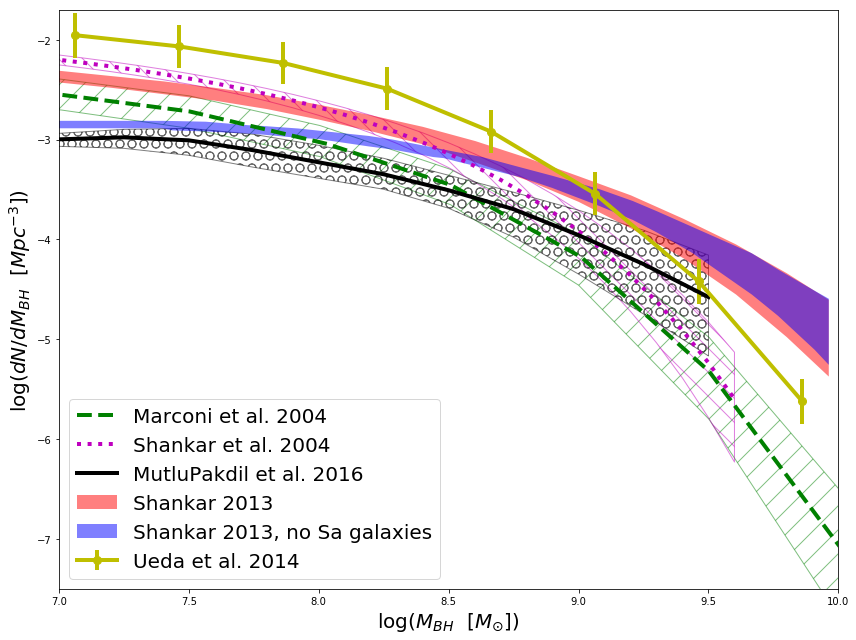

In [17]:
figure(figsize=(12,9))
plot(M04_mean[:,0],M04_mean[:,1],'g--',label="Marconi et al. 2004", lw=4)
M_new_high = interp(M04_low[:,0],M04_high[:,0], M04_high[:,1])
fill_between(M04_low[:,0],M04_low[:,1],M_new_high, facecolor='none', hatch='/', edgecolor='g', alpha=0.5)

plot(np.log10(x),np.log10(Sh04),'m:', label="Shankar et al. 2004", lw=4)
fill_between(np.log10(x),np.log10(Sh04_low),np.log10(Sh04_high), facecolor='none', hatch='\\', edgecolor='m', alpha=0.5)

# MP 16
plot(MP16[:,0],MP16[:,4],'k-',label="MutluPakdil et al. 2016", lw=4)
fill_between(MP16[:,0],MP16[:,4]+MP16[:,6],MP16[:,4]+MP16[:,5], facecolor='none', hatch='O', edgecolor='k', alpha=0.5)

# Hp 07
# plot(nx[:-1],ny[:-1],'y-.',label="Hopkins et al. 2016", lw=4)

# SH 09
# Sh_new_high = interp(Sh09_low[:,0],Sh09_high[:,0], Sh09_high[:,1])
# fill_between(Sh09_low[:,0],Sh09_low[:,1],Sh_new_high, facecolor='0.5', alpha=0.5, label='Shnkar et al. 2009')

# Ueda 14
errorbar(Ud14[:,0], Ud14[:,1], yerr=Ud14[:,2], marker='o', ms=8, color='y',lw=4, label='Ueda et al. 2014')

# for SH13
R_new_high = interp(Sh13_R_low[:,0],Sh13_R_high[:,0], Sh13_R_high[:,1])
fill_between(Sh13_R_low[:,0],Sh13_R_low[:,1],R_new_high, facecolor='red', alpha=0.5, label='Shankar 2013')
B_new_high = interp(Sh13_B_low[:,0],Sh13_B_high[:,0], Sh13_B_high[:,1])
fill_between(Sh13_B_low[:,0],Sh13_B_low[:,1],B_new_high, facecolor='blue', alpha=0.5, label='Shankar 2013, no Sa galaxies')

xlim(7,10)
ylim(-7.5, -1.7)
legend(fontsize=20)
xlabel(r'$\log (M_{BH} \ \ [M_{\odot}])$', fontsize=20)
ylabel(r'$\log (dN/dM_{BH} \ \ [Mpc^{-3}])$',fontsize=20)
tight_layout()
savefig("BHMF.pdf",dpi=300)

In [13]:
# Get number density
from scipy.integrate import simps

In [14]:
def integ(x,y):
    Ml = 7.0
    Y7 = interp(Ml, x, y)
    ids=x>Ml
    x=x[ids]
    y=y[ids]
    x=np.append(x,Ml)
    y=np.append(y,Y7)
    ids=np.argsort(x)
    x=x[ids]
    y=y[ids]
    return simps(10.**y,x), simps(10.**y*10**x,x)

In [15]:
print('Marconi2004:')
print "\t Mean:",integ(M04_mean[:,0],M04_mean[:,1]),'  Low: ', integ(M04_low[:,0],M04_low[:,1]), '  High: ', integ(M04_high[:,0],M04_high[:,1])
print('Shankar2004:')
print '\t Mean:',integ(np.log10(x),np.log10(Sh04)),'  Low: ', integ(np.log10(x),np.log10(Sh04_low)), '  High: ', integ(np.log10(x),np.log10(Sh04_high))
print('Shankar2013:')
print '\t Mean: use the mean of low and high','  Low: ', integ(Sh13_R_low[:,0],Sh13_R_low[:,1]), '  High: ', integ(Sh13_R_high[:,0],Sh13_R_high[:,1])
print('Shankar2013 no Sa galaxies:')
print '\t Mean: use the mean of low and high','  Low: ', integ(Sh13_B_low[:,0],Sh13_B_low[:,1]), '  High: ', integ(Sh13_B_high[:,0],Sh13_B_high[:,1])
print('MutluPakdil2016:')
print '\t Mean:',integ(MP16[:,0],MP16[:,4]),'  Low: ', integ(MP16[:,0],MP16[:,4]+MP16[:,6]), '  High: ', integ(MP16[:,0],MP16[:,4]+MP16[:,5])
print('Ueda2014:')
print '\t Mean:',integ(Ud14[:,0],Ud14[:,1]),'  Low: ', integ(Ud14[:,0],Ud14[:,1]-Ud14[:,2]), '  High: ', integ(Ud14[:,0],Ud14[:,1]+Ud14[:,2])

SyntaxError: invalid syntax (<ipython-input-15-68d708fe00b7>, line 2)

In [ ]:
948139.99662405916-1561770.6135443419